# Mission : Automatisation de l'automatisation
##Machine Learning
Crée un programme qui prendra en argument un dataframe propre, appliquera un découpage entre jeu d'entrainement et jeu de test (train_test_split), puis proposera à l'utilisateur de choisir l'algorithme à entrainer parmi les suivants. Le programme renverra alors la métrique indiquée pour le jeu d'entrainement et pour le jeu de test.
- Modèles supervisés (le programme demande alors quelle colonne est à prédire, la "target") :
  * Régression : linéaire, KNN (le programme prendra par défaut les 5 plus proches voisins). Métrique à afficher : score R2.
  * Classification : KNN (idem), régression logistique, naive bayes. Métrique à afficher : accuracy score.
- Clustering non-supervisé (pas de train test split) :
  * Kmeans : Afficher la métrique Silhouette pour les valeurs suivantes de k-clusters [2, 3, 4, 5, 10, 20].



Notes :
- Le train test split ne doit être effectué qu'une seule fois au lancement du programme, afin que les scores des différents modèles soient comparables.
- Le nom des colonnes sera affiché avant de demander à l'utilisateur de choisir la "target".
- Attention, les données doivent être numériques pour être acceptée dans scikit-learn, il est donc préférable que le programme fasse un test et filtre le dataframe.

Compléments si tu es en avance :
- Pour les modèles de type KNN, le choix du nombre de plus proches voisins peut être proposé à l'utilisateur. Idem pour le nombre de clusters du Kmeans.
- Une option "lancer toutes les régressions" peut être proposée à l'utilisateur, qui renverra les scores des différents modèles. Idem pour les classifications.

Afin de tester ton programme, tu pourras utiliser le dataset suivant (attention, il n'est pas adapté pour le nuage de mots) : [voitures](https://drive.google.com/file/d/1QsEAGzHVbEdVLhucK3TFURdKj7AiLCqD/view?usp=sharing)

##Text  mining

Génère un nuage de mots parmi les plus utilisés dans la tirade de Cyrano de Bergerac [disponible ici](https://libretheatre.fr/tirade-nez-cyrano-de-bergerac/), ou dans un autre texte de ton choix.
Tu devras auparavant utiliser un stemmer et/ou un lemmatizer, et supprimer la ponctuation.

Note :
- Il n'est pas nécessaire de faire du scraping dans le cadre de ce checkpoint, tu peux simplement faire un copier coller dans une variable texte.
- Tu peux utiliser un stemmer français existant, comme celui-ci : nltk.stem.snowball.FrenchStemmer()



## Machine Learning

### Programme

In [ ]:
'''Créations des fonctions'''
# Régression linéaire
def regression_linéaire(X_train, X_test, y_train, y_test):
  from sklearn.linear_model import LinearRegression
  reg = LinearRegression().fit(X_train, y_train)
  return reg.score(X_train, y_train)

# Régression KNN
def regressionKNN(X_train, X_test, y_train, y_test, nb_voisins):
  from sklearn.neighbors import KNeighborsRegressor
  reg_neigh = KNeighborsRegressor(n_neighbors = nb_voisins)
  reg_neigh.fit(X_train, y_train)
  return reg_neigh.score(X_train, y_train)

# Classification KNN
def classificationKNN(X_train, X_test, y_train, y_test, nb_voisins):
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.metrics import accuracy_score
  class_neigh = KNeighborsClassifier(n_neighbors = nb_voisins)
  class_neigh.fit(X_train, y_train)
  y_pred = class_neigh.predict(X_test)
  return accuracy_score(y_test, y_pred)

# Régression logistique
def regressionlogisitique(X_train, X_test, y_train, y_test):
  from sklearn.linear_model import LogisticRegression
  clf = LogisticRegression(solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  return accuracy_score(y_test, y_pred)

# Naive bayes
def naivebayes(X_train, X_test, y_train, y_test):
  from sklearn.naive_bayes import GaussianNB
  clf_bayes = GaussianNB()
  clf_bayes.fit(X_train, y_train)
  y_pred = clf_bayes.predict(X_test)
  return accuracy_score(y_test, y_pred)

# Kmeans
def kmeans(X,y):
  from sklearn.cluster import KMeans
  from sklearn import metrics
  n_clusters =  [2, 3, 4, 5, 10, 20]
  for n in n_clusters:
    kmeans = KMeans(n).fit(X)
    print("Pour {} clusters, le silhouette score est de {}.".format(n, metrics.silhouette_score(X, y, metric='sqeuclidean')))

'''Programme'''
import pandas as pd # Import modules
import numpy as np
from google.colab import files
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

deux_choix = ['1', '2'] # Création des listes
trois_choix = ['1', '2', '3']
quatre_choix = ['1', '2', '3', '4']

import_data = input("Vous souhaitez importer votre dataframe à l'aide d'un lien (1) ou vous souhaitez l'upload (2) ? ") # Import dataset
while import_data not in deux_choix:
  print("Cette propostion n'existe pas.")
  import_data = input("Vous souhaitez importer votre dataframe à l'aide d'un lien (1) ou vous souhaitez l'upload (2) ? ")
if import_data == '1':
  url = input("Entrez le lien de votre dataset : ")
  df = pd.read_csv(url)
else:
  files.upload()
  name = input("Nom du fichier ? ")
df = pd.read_csv('cars.csv')

print()

print(df.columns) # Choix de la target
target = input("Choisissez votre 'target' : ")
while target not in df.columns:
  print("Cette colonne n'existe pas ou est mal orthographiée.")
  target = input("Choisissez votre 'target' : ")
le = preprocessing.LabelEncoder()
df[target] = le.fit_transform(df[target])

df = pd.get_dummies(df) # Pour les colonnes non numériques

X = df.drop(columns = target) # Train_test_split
y = df[target]
rd_state = int(input("Choisissez un 'random_state' pour le train_test_split, un chiffre aura le même découpage à chaque essais : "))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = rd_state)

print()

tout_ou_un = input("Souhaitez-vous tester tous les algorithmes disponibles ? (1) Ou vous voulez choisir un algorithme en particulier ? (2) ") # Tout ou visé
while tout_ou_un not in deux_choix :
  print("Cette propostion n'existe pas.")
  tout_ou_un = input("Souhaitez-vous tester tous les algorithmes disponibles ? (1) Ou vous voulez choisir un algorithme en particulier ? (2) ")
if tout_ou_un == '2':
  print("Quel algorithme voulez-vous utiliser ? ") # Choix de l'algorithme
  choix_algo = input("Supervisé (1) ou non supervisé (2) ? ")
  while choix_algo not in deux_choix :
    print("Cette propostion n'existe pas.")
    choix_algo = input("Supervisé (1) ou non supervisé (2) ? ")
  if choix_algo == '1':
    choix_algo_super = input("Régression (1) ou classification (2) ? ")
    while choix_algo_super not in deux_choix :
      print("Cette propostion n'existe pas.")
      choix_algo_super = input("Régression (1) ou classification (2) ? ")
    if choix_algo_super == '1':
      choix_algo_super_reg = input("Régression linaire (1), régression KNN (2) ou les deux (3) ? ")
      while choix_algo_super_reg not in trois_choix :
        print("Cette propostion n'existe pas.")
        choix_algo_super_reg = input("Régression linaire (1) ou régression KNN (2) ? ")
      if choix_algo_super_reg == '1':
        print("Vous avez choisi une régression linéaire.")
        print("Le score de cet algorithme est de {}.".format(regression_linéaire(X_train, X_test, y_train, y_test))) # Régression linaire
      elif choix_algo_super_reg == '2':
        print("Vous avez choisi une régression KNN.")
        nb_voisins = int(input('Combien de voisins voulez vous ? '))
        print("Le score de cet algorithme avec {} voisins est de {}.".format(nb_voisins, regressionKNN(X_train, X_test, y_train, y_test, nb_voisins))) # Régression KNN
      else:
        print("Vous avez decidez de lancer les deux régressions.") # Les deux régressions
        print()
        print("Le score pour une régression linéaire est de {}.".format(regression_linéaire(X_train, X_test, y_train, y_test)))
        nb_voisins = int(input('Combien de voisins voulez vous pour la régression KNN ? '))
        print()
        print("Le score pour une régression KNN avec {} voisins est de {}.".format(nb_voisins, regressionKNN(X_train, X_test, y_train, y_test, nb_voisins)))
    else:
      choix_algo_super_class = input("Classification KNN (1), régression logistique (2), naive bayes (3) ou les trois (4) ? ")
      while choix_algo_super_class not in quatre_choix :
        print("Cette propostion n'existe pas.")
        choix_algo_super_class = input("Classification KNN (1), régression logistique (2), naive bayes (3) ou les trois (4) ? ")
      if choix_algo_super_class == '1':
        print("Vous avez choisi une classification KNN.")
        print("L'accuracy_score de cet algorithme est de {}".format(nb_voisins, classificationKNN(X_train, X_test, y_train, y_test))) # Classification KNN
      elif choix_algo_super_class == '2':
        print("Vous avez choisi une régression logistique.")
        print("L'accuracy_score de cet algorithme est de {}".format(regressionlogisitique(X_train, X_test, y_train, y_test))) # Régression logistique
      elif choix_algo_super_class == '3':
        print("Vous avez choisi un naive bayes.")
        print("L'accuracy_score de cet algorithme est de {}".format(naivebayes(X_train, X_test, y_train, y_test))) # Naive bayes
      else:
        print("Vous avez decidez de lancer les trois classifications.") # Les trois classifications
        nb_voisins = int(input('Combien de voisins voulez vous pour la classification KNN ? '))
        print("L'accuracy_score pour une classification KNN avec {} voisins est de {}.".format(nb_voisins, classificationKNN(X_train, X_test, y_train, y_test, nb_voisins)))
        print()
        print("L'accuracy_score pour une régression logistique est de {}".format(regressionlogisitique(X_train, X_test, y_train, y_test)))
        print()
        print("L'accuracy_score pour un naive bayes est de {}".format(naivebayes(X_train, X_test, y_train, y_test)))
  else:
    print("Le clustering est le seul algorithme non supervisé dans ce programme pour le moment.")
    kmeans(X,y) # Kmeans
else:
  print("Le score pour une régression linéaire est de {}.".format(regression_linéaire(X_train, X_test, y_train, y_test)))
  print()
  nb_voisins = int(input('Combien de voisins voulez vous pour la régression KNN ? '))
  print("Le score pour une régression KNN avec {} voisins est de {}.".format(nb_voisins, regressionKNN(X_train, X_test, y_train, y_test, nb_voisins)))
  print()
  nb_voisins = int(input('Combien de voisins voulez vous pour la classification KNN ? '))
  print("Le score pour une classification KNN avec {} voisins est de {}.".format(nb_voisins, classificationKNN(X_train, X_test, y_train, y_test, nb_voisins)))
  print()
  print("L'accuracy_score pour une régression logistique est de {}".format(regressionlogisitique(X_train, X_test, y_train, y_test)))
  print()
  print("L'accuracy_score pour un naive bayes est de {}".format(naivebayes(X_train, X_test, y_train, y_test)))
  print()
  print("Pour le clustering :")
  kmeans(X,y)

Vous souhaitez importer votre dataframe à l'aide d'un lien (1) ou vous souhaitez l'upload (2) ? 2


Saving cars.csv to cars (1).csv
Nom du fichier ? cars.csv

Index(['mpg', ' cylinders', ' cubicinches', ' hp', ' weightlbs', ' time-to-60',
       ' year', ' brand'],
      dtype='object')
Choisissez votre 'target' : fevzc
Cette colonne n'existe pas ou est mal orthographiée.
Choisissez votre 'target' : vez
Cette colonne n'existe pas ou est mal orthographiée.
Choisissez votre 'target' :  brand
Choisissez un 'random_state' pour le train_test_split, un chiffre aura le même découpage à chaque essais : 4

Souhaitez-vous tester tous les algorithmes disponibles ? (1) Ou vous voulez choisir un algorithme en particulier ? (2) 2
Quel algorithme voulez-vous utiliser ? 
Supervisé (1) ou non supervisé (2) ? 1
Régression (1) ou classification (2) ? 1
Régression linaire (1), régression KNN (2) ou les deux (3) ? 3
Vous avez decidez de lancer les deux régressions.

Le score pour une régression linéaire est de 0.5129612930031056.
Combien de voisins voulez vous pour la régression KNN ? 5

Le score pour un

### Test sur cars

In [ ]:
# Import des modules
import pandas as pd
import numpy as np

from google.colab import files

In [ ]:
# Import dataset
files.upload()
df = pd.read_csv('cars.csv')

Saving cars.csv to cars.csv


In [ ]:
df.head()

mpg   cylinders   cubicinches  ...   time-to-60   year     brand
0  14.0           8           350  ...           12   1972       US.
1  31.9           4            89  ...           14   1980   Europe.
2  17.0           8           302  ...           11   1971       US.
3  15.0           8           400  ...           10   1971       US.
4  30.5           4            98  ...           17   1978       US.

[5 rows x 8 columns]

In [ ]:
df.isnull().sum()

mpg             0
 cylinders      0
 cubicinches    0
 hp             0
 weightlbs      0
 time-to-60     0
 year           0
 brand          0
dtype: int64

In [ ]:
df.dtypes

mpg             float64
 cylinders        int64
 cubicinches      int64
 hp               int64
 weightlbs        int64
 time-to-60       int64
 year             int64
 brand           object
dtype: object

In [ ]:
df.nunique()

mpg             103
 cylinders        5
 cubicinches     76
 hp              85
 weightlbs      241
 time-to-60      17
 year            13
 brand            3
dtype: int64

In [ ]:
df1 = df.copy()

In [ ]:
# Target
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

df[' brand'] = le.fit_transform(df[' brand'])

In [ ]:
# Train_test_split
from sklearn.model_selection import train_test_split

X = df.iloc[:, 0:7]
y = df.iloc[:, 7]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4)

In [ ]:
# Régression linéaire
def regression_linéaire(X_train, X_test, y_train, y_test):
  from sklearn.linear_model import LinearRegression

  reg = LinearRegression().fit(X_train, y_train)
  return reg.score(X_train, y_train)

regression_linéaire(X_train, X_test, y_train, y_test)

0.5129612930031056

In [ ]:
# Régression KNN
nb_voisins = 5
def regressionKNN(X_train, X_test, y_train, y_test, nb_voisins):
  from sklearn.neighbors import KNeighborsRegressor

  reg_neigh = KNeighborsRegressor(n_neighbors = nb_voisins)
  reg_neigh.fit(X_train, y_train)
  return reg_neigh.score(X_train, y_train)

regressionKNN(X_train, X_test, y_train, y_test, nb_voisins)

0.5653744568458721

In [ ]:
# Classification KNN
nb_voisins = 5
def classificationKNN(X_train, X_test, y_train, y_test, nb_voisins):
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.metrics import accuracy_score

  class_neigh = KNeighborsClassifier(n_neighbors = nb_voisins)
  class_neigh.fit(X_train, y_train)

  y_pred = class_neigh.predict(X_test)

  return accuracy_score(y_test, y_pred)

classificationKNN(X_train, X_test, y_train, y_test, nb_voisins)

0.696969696969697

In [ ]:
# Régression logistique
def regressionlogisitique(X_train, X_test, y_train, y_test):
  from sklearn.linear_model import LogisticRegression

  clf = LogisticRegression(solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)

  y_pred = clf.predict(X_test)

  return accuracy_score(y_test, y_pred)

regressionlogisitique(X_train, X_test, y_train, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.7121212121212122

In [ ]:
# Naive bayes
def naivebayes(X_train, X_test, y_train, y_test):
  from sklearn.naive_bayes import GaussianNB

  clf_bayes = GaussianNB()
  clf_bayes.fit(X_train, y_train)

  y_pred = clf_bayes.predict(X_test)

  return accuracy_score(y_test, y_pred)

naivebayes(X_train, X_test, y_train, y_test)

0.6818181818181818

In [ ]:
# Kmeans
def kmeans(X,y):
  from sklearn.cluster import KMeans
  from sklearn import metrics
  n_clusters =  [2, 3, 4, 5, 10, 20]

  for n in n_clusters:
    kmeans = KMeans(n).fit(X)
    print("Pour {} clusters, le silhouette score est de {}.".format(n, metrics.silhouette_score(X, y, metric='sqeuclidean')))

kmeans(X,y)

Pour 2 clusters, le silhouette score est de 0.06644285576151159.
Pour 3 clusters, le silhouette score est de 0.06644285576151159.
Pour 4 clusters, le silhouette score est de 0.06644285576151159.
Pour 5 clusters, le silhouette score est de 0.06644285576151159.
Pour 10 clusters, le silhouette score est de 0.06644285576151159.
Pour 20 clusters, le silhouette score est de 0.06644285576151159.


## Text mining

### Préparation du texte

In [ ]:
text = "Ah ! non ! c’est un peu court, jeune homme !\
On pouvait dire… Oh ! Dieu ! … bien des choses en somme…\
En variant le ton, – par exemple, tenez :\
Agressif : « Moi, monsieur, si j’avais un tel nez,\
Il faudrait sur-le-champ que je me l’amputasse ! »\
Amical : « Mais il doit tremper dans votre tasse\
Pour boire, faites-vous fabriquer un hanap ! »\
Descriptif : « C’est un roc ! … c’est un pic ! … c’est un cap !\
Que dis-je, c’est un cap ? … C’est une péninsule ! »\
Curieux : « De quoi sert cette oblongue capsule ?\
D’écritoire, monsieur, ou de boîte à ciseaux ? »\
Gracieux : « Aimez-vous à ce point les oiseaux\
Que paternellement vous vous préoccupâtes\
De tendre ce perchoir à leurs petites pattes ? »\
Truculent : « Ça, monsieur, lorsque vous pétunez,\
La vapeur du tabac vous sort-elle du nez\
Sans qu’un voisin ne crie au feu de cheminée ? »\
Prévenant : « Gardez-vous, votre tête entraînée\
Par ce poids, de tomber en avant sur le sol ! »\
Tendre : « Faites-lui faire un petit parasol\
De peur que sa couleur au soleil ne se fane ! »\
Pédant : « L’animal seul, monsieur, qu’Aristophane\
Appelle Hippocampéléphantocamélos\
Dut avoir sous le front tant de chair sur tant d’os ! »\
Cavalier : « Quoi, l’ami, ce croc est à la mode ?\
Pour pendre son chapeau, c’est vraiment très commode ! »\
Emphatique : « Aucun vent ne peut, nez magistral,\
T’enrhumer tout entier, excepté le mistral ! »\
Dramatique : « C’est la Mer Rouge quand il saigne ! »\
Admiratif : « Pour un parfumeur, quelle enseigne ! »\
Lyrique : « Est-ce une conque, êtes-vous un triton ? »\
Naïf : « Ce monument, quand le visite-t-on ? »\
Respectueux : « Souffrez, monsieur, qu’on vous salue,\
C’est là ce qui s’appelle avoir pignon sur rue ! »\
Campagnard : « Hé, ardé ! C’est-y un nez ? Nanain !\
C’est queuqu’navet géant ou ben queuqu’melon nain ! »\
Militaire : « Pointez contre cavalerie ! »\
Pratique : « Voulez-vous le mettre en loterie ?\
Assurément, monsieur, ce sera le gros lot ! »\
Enfin parodiant Pyrame en un sanglot :\
« Le voilà donc ce nez qui des traits de son maître\
A détruit l’harmonie ! Il en rougit, le traître ! »\
– Voilà ce qu’à peu près, mon cher, vous m’auriez dit\
Si vous aviez un peu de lettres et d’esprit\
Mais d’esprit, ô le plus lamentable des êtres,\
Vous n’en eûtes jamais un atome, et de lettres\
Vous n’avez que les trois qui forment le mot : sot !\
Eussiez-vous eu, d’ailleurs, l’invention qu’il faut\
Pour pouvoir là, devant ces nobles galeries,\
me servir toutes ces folles plaisanteries,\
Que vous n’en eussiez pas articulé le quart\
De la moitié du commencement d’une, car\
Je me les sers moi-même, avec assez de verve,\
Mais je ne permets pas qu’un autre me les serve."

In [ ]:
# Import des modules
from nltk import word_tokenize
import string
import nltk
nltk.download()

In [ ]:
# Suppression ponctuations
ponctuations = list(string.punctuation)
ponctuations.append('«')
ponctuations.append('»')
ponctuations.append('…')

text_sans_ponctuations = " ".join("".join([" " if ch in ponctuations else ch for ch in text]).split())

In [ ]:
# Séparation du texte en mots
text_token = word_tokenize(text_sans_ponctuations)
print(text_token)

['Ah', 'non', 'c', '’', 'est', 'un', 'peu', 'court', 'jeune', 'homme', 'On', 'pouvait', 'dire', 'Oh', 'Dieu', 'bien', 'des', 'choses', 'en', 'somme', 'En', 'variant', 'le', 'ton', '–', 'par', 'exemple', 'tenez', 'Agressif', 'Moi', 'monsieur', 'si', 'j', '’', 'avais', 'un', 'tel', 'nez', 'Il', 'faudrait', 'sur', 'le', 'champ', 'que', 'je', 'me', 'l', '’', 'amputasse', 'Amical', 'Mais', 'il', 'doit', 'tremper', 'dans', 'votre', 'tassePour', 'boire', 'faites', 'vous', 'fabriquer', 'un', 'hanap', 'Descriptif', 'C', '’', 'est', 'un', 'roc', 'c', '’', 'est', 'un', 'pic', 'c', '’', 'est', 'un', 'cap', 'Que', 'dis', 'je', 'c', '’', 'est', 'un', 'cap', 'C', '’', 'est', 'une', 'péninsule', 'Curieux', 'De', 'quoi', 'sert', 'cette', 'oblongue', 'capsule', 'D', '’', 'écritoire', 'monsieur', 'ou', 'de', 'boîte', 'à', 'ciseaux', 'Gracieux', 'Aimez', 'vous', 'à', 'ce', 'point', 'les', 'oiseauxQue', 'paternellement', 'vous', 'vous', 'préoccupâtesDe', 'tendre', 'ce', 'perchoir', 'à', 'leurs', 'petites',

In [ ]:
# Suppression des stop words
from nltk.corpus import stopwords

stop_words = set(stopwords.words('french'))

filtered_text = [w for w in text_token if not w in stop_words]

print(filtered_text)

['Ah', 'non', '’', 'peu', 'court', 'jeune', 'homme', 'On', 'pouvait', 'dire', 'Oh', 'Dieu', 'bien', 'choses', 'somme', 'En', 'variant', '–', 'exemple', 'tenez', 'Agressif', 'Moi', 'monsieur', 'si', '’', 'tel', 'nez', 'Il', 'faudrait', 'champ', '’', 'amputasse', 'Amical', 'Mais', 'doit', 'tremper', 'tassePour', 'boire', 'faites', 'fabriquer', 'hanap', 'Descriptif', 'C', '’', 'roc', '’', 'pic', '’', 'cap', 'Que', 'dis', '’', 'cap', 'C', '’', 'péninsule', 'Curieux', 'De', 'quoi', 'sert', 'cette', 'oblongue', 'capsule', 'D', '’', 'écritoire', 'monsieur', 'boîte', 'ciseaux', 'Gracieux', 'Aimez', 'point', 'oiseauxQue', 'paternellement', 'préoccupâtesDe', 'tendre', 'perchoir', 'leurs', 'petites', 'pattes', 'Truculent', 'Ça', 'monsieur', 'lorsque', 'pétunez', 'La', 'vapeur', 'tabac', 'sort', 'nezSans', '’', 'voisin', 'crie', 'feu', 'cheminée', 'Prévenant', 'Gardez', 'tête', 'entraînéePar', 'poids', 'tomber', 'avant', 'sol', 'Tendre', 'Faites', 'faire', 'petit', 'parasolDe', 'peur', 'couleur', 

In [ ]:
# Utilisation du stemmer
from nltk.stem.snowball import SnowballStemmer
stemmer = nltk.stem.snowball.FrenchStemmer()

filtered_text_stemmer = " ".join(stemmer.stem(filtered_text) for filtered_text in filtered_text)
filtered_text_stemmer = word_tokenize(filtered_text_stemmer)

In [ ]:
text_final = (" ").join(filtered_text_stemmer)

### WordCloud

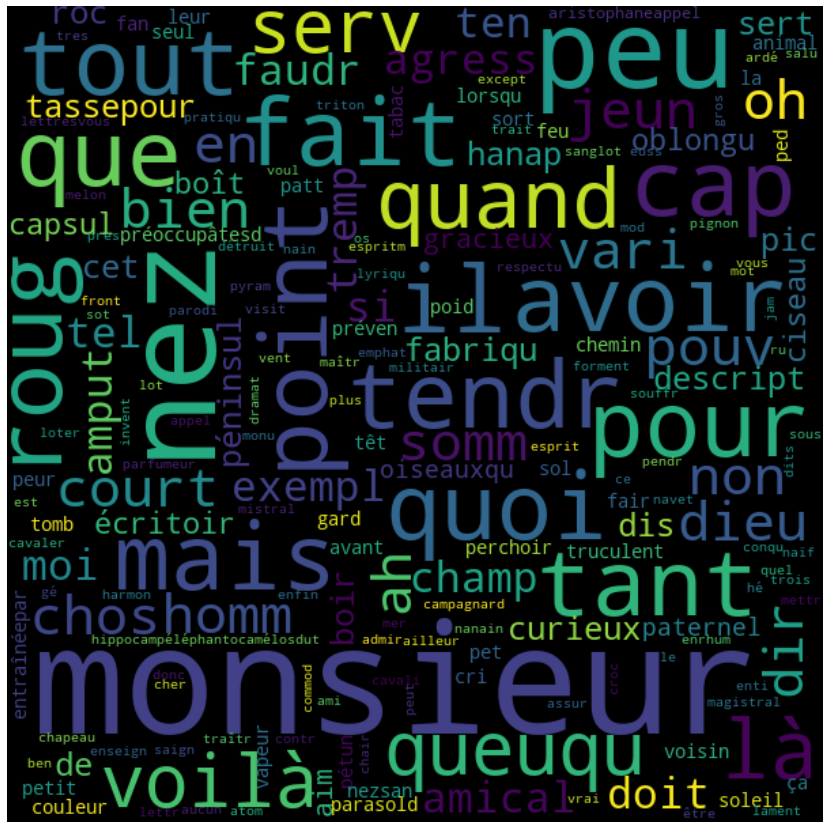

In [ ]:
'''WordCloud'''

# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create the wordcloud object
wordcloud = WordCloud(width = 600, height = 600, margin = 0).generate(text_final)

# Display the generated image:
plt.figure(figsize = (15, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x = 0, y = 0)
plt.show()